# Loan Data Analysis from Prosper

#### By Cynthia Nakaoka

## Introduction

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
>The data dictionary that explains the variables in the data set you can find [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

This data analysis is divided into:
- [Univariate Exploration](#1)
- [Bivariate Exploration](#2)
- [Multivariate Exploration](#3)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset into a pandas dataframe and print the dataset features
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
print(df.info())
df.head(10)

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# print data statistics
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [4]:
# dataset correlation
df.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014688,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.126031,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.092813,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.053481,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


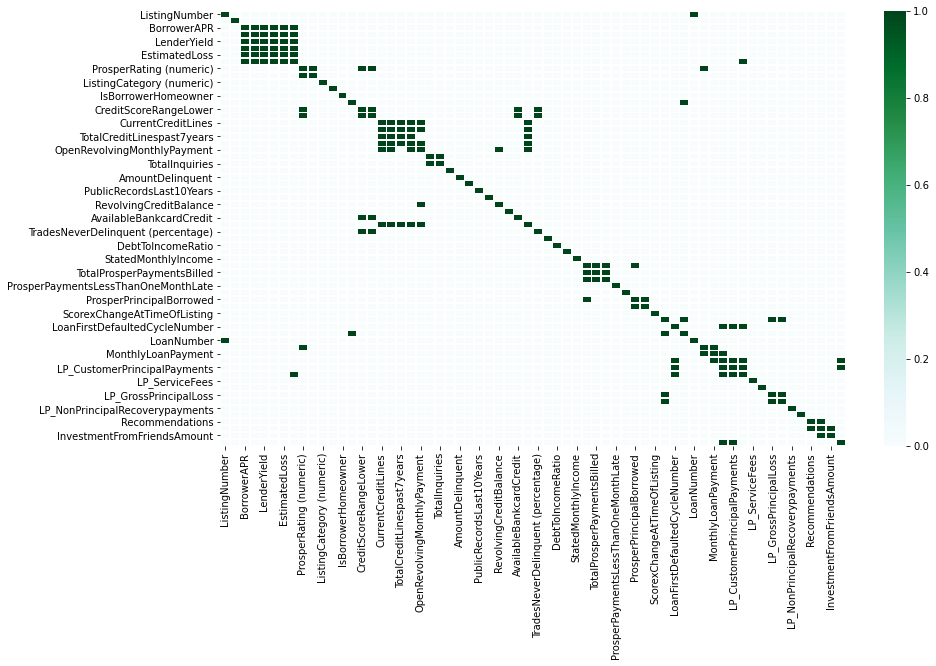

In [5]:
# to better understand the correlation of the dataset, plot a heat map of data whose correlation coefficient value is above 0.4
plt.figure(figsize = [14,8])
sns.heatmap(df.corr() > 0.4, fmt = '.3f', linewidths=.8,
           cmap = 'BuGn')

plt.show()

### What is the structure of Prosper Loan dataset?

> There are 113937 loans data in the dataset with 80 features. Most of data is in a numeric values and some are in categorical data.

### What are the main features of interest in this dataset?

- Which borrower features are best for predicting the highest rate of return?
- What are the best features to increase the chance of getting a loan?

### What features in the dataset do you think will help support your investigation into your features of interest?

> There are many features to explore in the dataset, the main ones that will be investigated are:

- EstimatedReturn
- Actual Return
- CreditGrade
- BorrowerAPR
- LenderYield
- EstimatedLoss
- ProsperScore
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- CurrentCreditLines
- TotalCreditLinespast7years
- InquiriesLast6Months
- TotalInquiries
- CurrentDelinquencies
- AmountDelinquent
- BankcardUtilization
- AvailableBankcardCredit
- DebtToIncomeRatio
- IncomeRange
- ProsperPrincipalBorrowed
- LoanOriginationDate
- LoanOriginationQuarter
- MonthlyLoanPayment
- PercentFunded
- Recommendations

## Univariate Exploration
<a id="1"></a>

####  Which borrower's features are best for predicting the highest rate of return? 
To answer this question, I'll start by looking at the distribution of the main variable of interest: Estimated Return. Then, one appeal by one will be investigated individually.

#### Estimated Return

In [6]:
# describe the estimated return data
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

In [7]:
# drop null rows
df.EstimatedReturn.dropna(axis = 0, inplace = True)

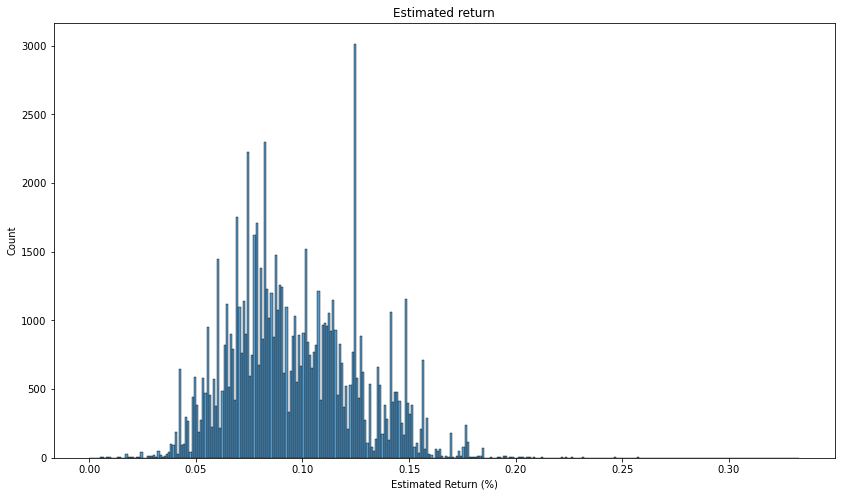

In [8]:
# plot histogram 
plt.figure(figsize=[14, 8])
bins = np.arange(0, df.EstimatedReturn.max()+0.05, 0.001)
sns.histplot(data = df, x = 'EstimatedReturn', bins = bins, linewidth=0.4);
plt.title('Estimated return')
plt.xlabel('Estimated Return (%)')
plt.ylabel('Count');

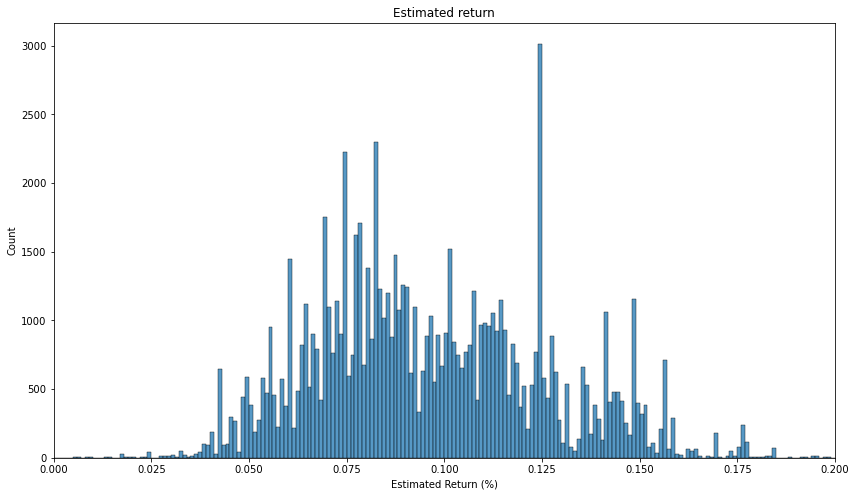

In [9]:
# plot a histogram with concentration of return data in 0 until 0.2
plt.figure(figsize=[14, 8])
bins = np.arange(0, df.EstimatedReturn.max()+0.05, 0.001)
sns.histplot(data = df, x = 'EstimatedReturn', bins = bins, linewidth=0.4);
plt.title('Estimated return')
plt.xlabel('Estimated Return (%)')
plt.ylabel('Count')
plt.xlim(0, .2);

There is a concentration of estimated return in a range of 0% until 20%. It also shows there are some peaks in 6%, 7%, 12% and 15%. The graph distribution appers to be right skewed.

#### Actual Returns
To calculate the historical return based on current payments it was necessary to use the Historical Return formula on Prosper's own [website](https://prosper.zendesk.com/hc/en-us/articles/360001288366-Frequently-Asked-Questions-about-Historical-Returns)

In [10]:
# based on the formula on the Prosper website, the historical/actual rate of return was calculated
df['ActualReturns'] = df.LP_CustomerPayments - df.LoanOriginalAmount - df.LP_ServiceFees - df.LP_CollectionFees + df.LP_NonPrincipalRecoverypayments - df.LP_NetPrincipalLoss
df['ActualReturns'] = 1 + (df.ActualReturns / df.LoanOriginalAmount)
df.ActualReturns

0         1.223270
1         0.000000
2         1.403142
3         0.525121
4         0.192008
            ...   
113932    0.372298
113933    1.180300
113934    0.056361
113935    1.423841
113936    0.033015
Name: ActualReturns, Length: 113937, dtype: float64

In [11]:
# see Actual Returns statistics
df.ActualReturns.describe()

count    113937.000000
mean          0.536249
std           0.618363
min          -1.000650
25%           0.076320
50%           0.424493
75%           1.120453
max           2.602880
Name: ActualReturns, dtype: float64

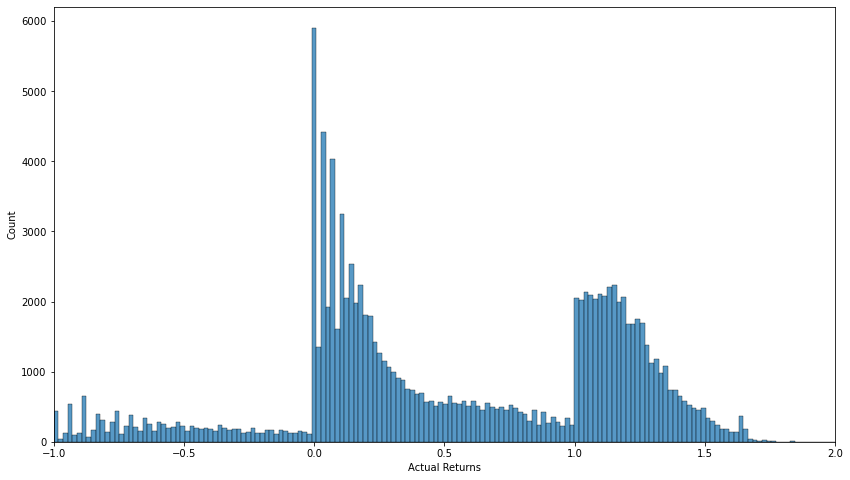

In [12]:
# plot Actual Return distribution

plt.figure(figsize = [14,8])
sns.histplot(df.ActualReturns, bins = 200)
plt.xlabel('Actual Returns')
plt.ylabel('Count')
plt.xlim(-1, 2);

There are small amounts of total loan loss and a large spike of zero-to-zero situations in relation to financial returns. There are two large returns concentration in the 0% - 50% ranges and one in the 100% to 170% return ranges.

#### Borrower APR

In [13]:
# describe the Borrower Annual Percentage Rate (APR) to understand the statistics
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

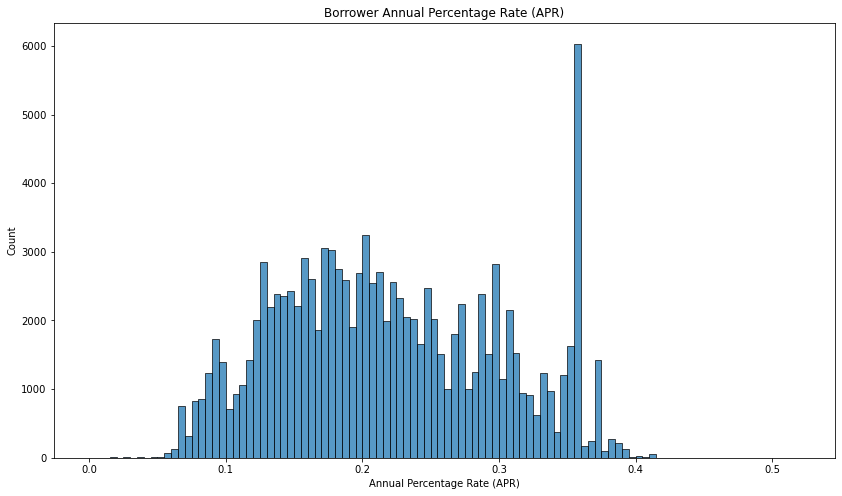

In [14]:
# plot a histogram of Borroers Annual Percentage Rate

plt.figure(figsize=[14, 8])
bins = np.arange(0, df.BorrowerAPR.max()+0.01, 0.005)
sns.histplot(data = df, x = 'BorrowerAPR', bins = bins);
plt.title('Borrower Annual Percentage Rate (APR)')
plt.xlabel('Annual Percentage Rate (APR)')
plt.ylabel('Count');

The mean of Annual Percentage Rate is  21%. There is a large peak in 36% and very few loan have an APR greater than 40%.

####  Estimated Loss

In [15]:
df.EstimatedLoss.describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

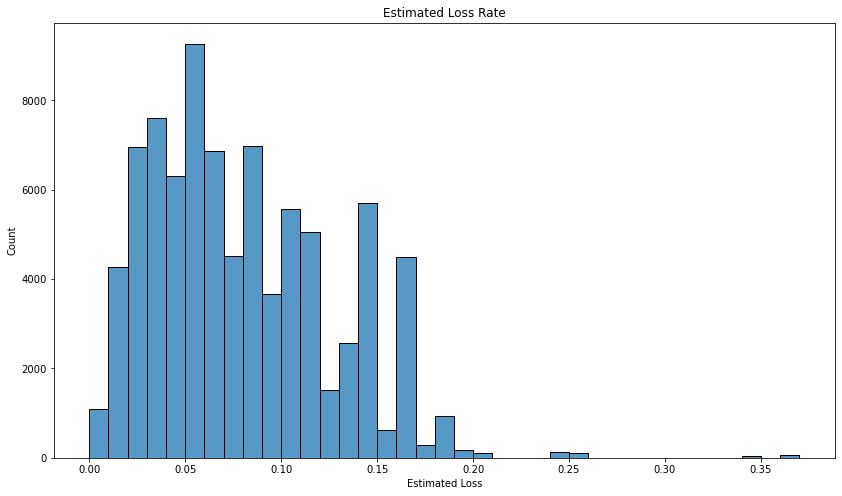

In [16]:
# plot a histogram of Estimated Loss rate
bins = np.arange(0, df.EstimatedLoss.max()+0.01, 0.01)
plt.figure(figsize=[14, 8])
sns.histplot(data = df, x = 'EstimatedLoss', bins = bins);
plt.title('Estimated Loss Rate')
plt.xlabel('Estimated Loss')
plt.ylabel('Count');

The estimated average loss is 8%. From 5% the histogram shows a downtrend in the amount of loss and very few loans have a loss greater than 20%.

#### Credit Grade

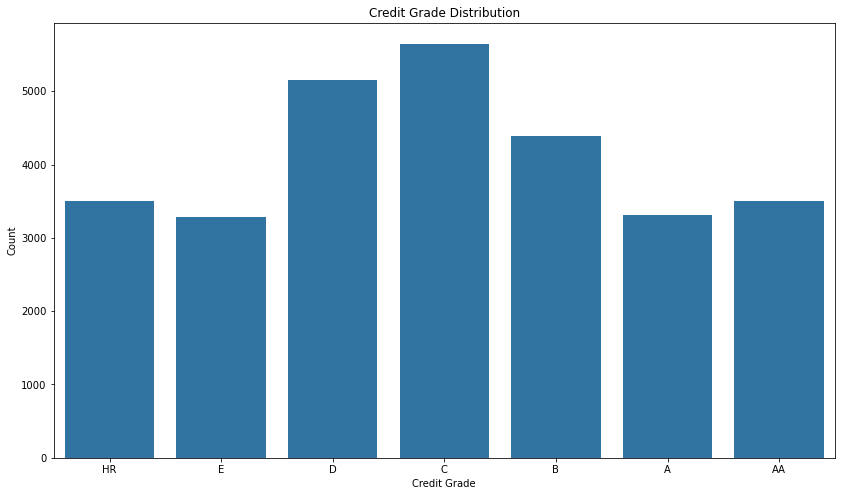

In [17]:
# convert credit grade into ordered categorical types, then plot a histogram of this distribution

credit_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = credit_order)
df['CreditGrade'] = df['CreditGrade'].astype(ordered_var)

plt.figure(figsize = [14,8])
color = sns.color_palette()[0]
sns.countplot(data = df, x = 'CreditGrade', color = color)
plt.title('Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('Count');

In the total number of people who took out a loan, the majority had credit grades of 'C', 'D' and 'B', respectively.

#### Prosper Score

In [18]:
df.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

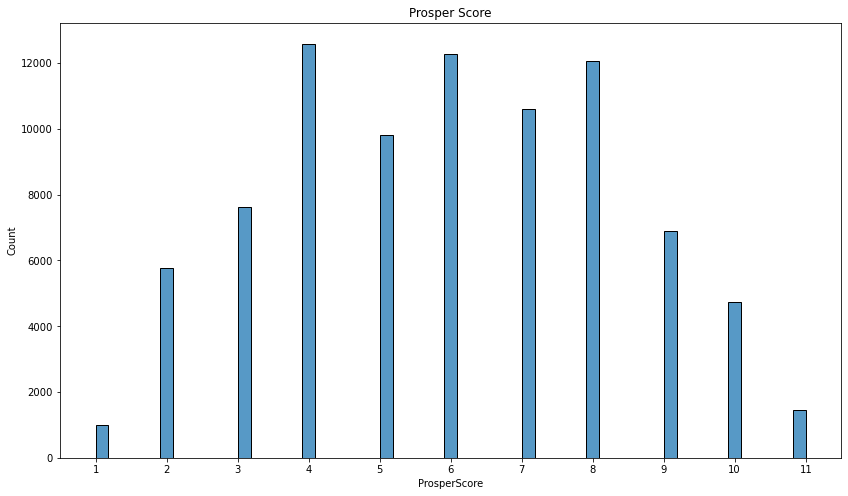

In [19]:
# plot a Prosper Score histogram
plt.figure(figsize = [14, 8])
base_color = sns.color_palette()[0]
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
labels = ['{}'.format(val) for val in ticks]
sns.histplot(data = df, x = 'ProsperScore')
plt.xticks(ticks, labels)
plt.title('Prosper Score')
plt.xlabel('ProsperScore');

The Prosper Score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
The average is 5.95 and the points with the highest concentration of loan applications range from 4 to 8 points.

#### Employment Status

In [20]:
# show the categories of employments
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

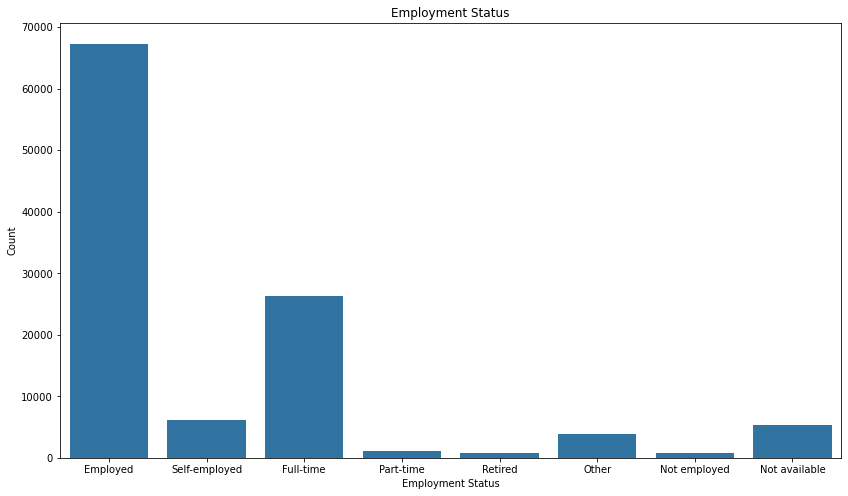

In [21]:
# plot a histogram of Employment Status

status = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = status)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_var)

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.countplot(data = df, x = 'EmploymentStatus', color = color)
plt.title('Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count');

Most borrowers are employed or have some activity. The minority are retired, unemployed or working part-time.

#### Is Borrower Homeowner?

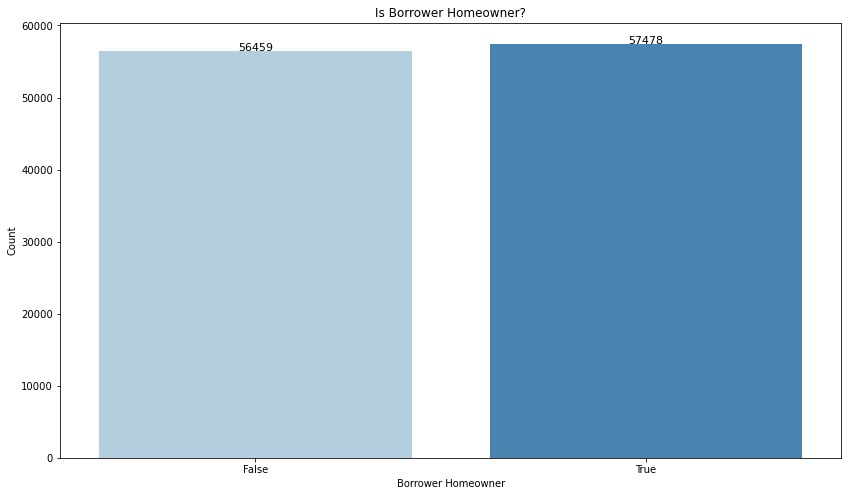

In [22]:
# plot the count of Borrower Homeowner

plt.figure(figsize=[14, 8])
ax = sns.countplot(data = df, x = 'IsBorrowerHomeowner', palette = "Blues");
plt.title('Is Borrower Homeowner?')
plt.xlabel('Borrower Homeowner')
plt.ylabel('Count')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment = 'center', fontsize = 11)

There is a slight difference between the owners and non-owners who have applied for a loan.

#### Current Credit Lines

In [23]:
df.CurrentCreditLines.describe()

count    106333.000000
mean         10.317192
std           5.457866
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          59.000000
Name: CurrentCreditLines, dtype: float64

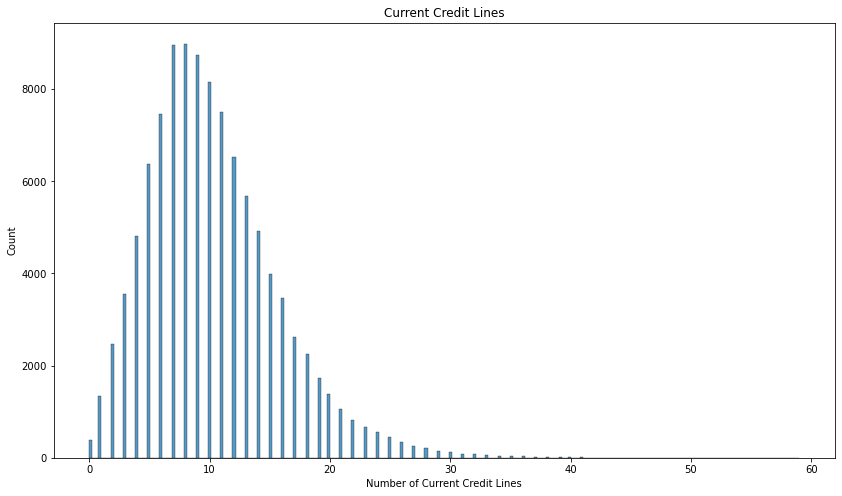

In [24]:
# plot the Number of Current Credit Lines 
plt.figure(figsize=[14, 8])
sns.histplot(data = df, x = 'CurrentCreditLines');
plt.title('Current Credit Lines')
plt.xlabel('Number of Current Credit Lines')
plt.ylabel('Count');

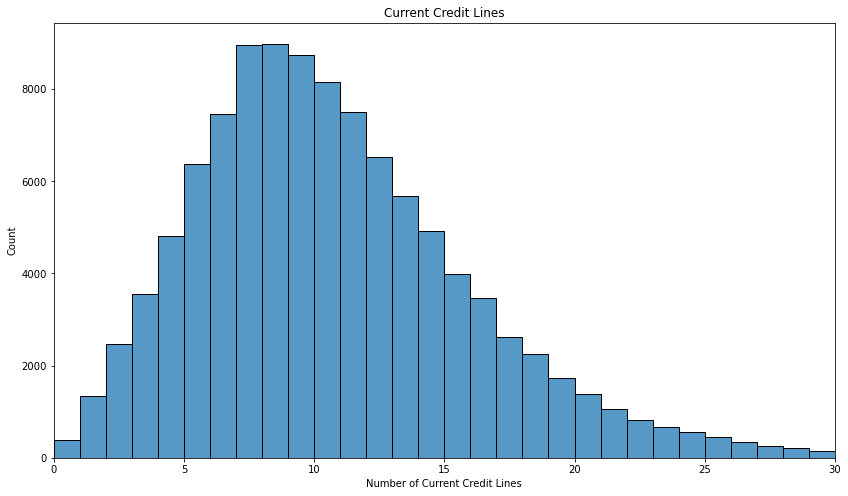

In [25]:
# plot the Number of Current Credit Lines 
plt.figure(figsize=[14, 8])
bins = np.arange(0, df.CurrentCreditLines.max()+1, 1)
sns.histplot(data = df, x = 'CurrentCreditLines', bins = bins);
plt.title('Current Credit Lines')
plt.xlabel('Number of Current Credit Lines')
plt.ylabel('Count')
plt.xlim(0, 30);

The mean of number of Current Credit Lines were 10 lines. Those numbers refers at the time the credit profile was pulled. The graph distribution appers to be right skewed.
Curiosity: The maximum number of credit lines is 59! This is a lot for only one person!

#### Total Credit Lines past 7 years

In [26]:
df.TotalCreditLinespast7years.describe()

count    113240.000000
mean         26.754539
std          13.637871
min           2.000000
25%          17.000000
50%          25.000000
75%          35.000000
max         136.000000
Name: TotalCreditLinespast7years, dtype: float64

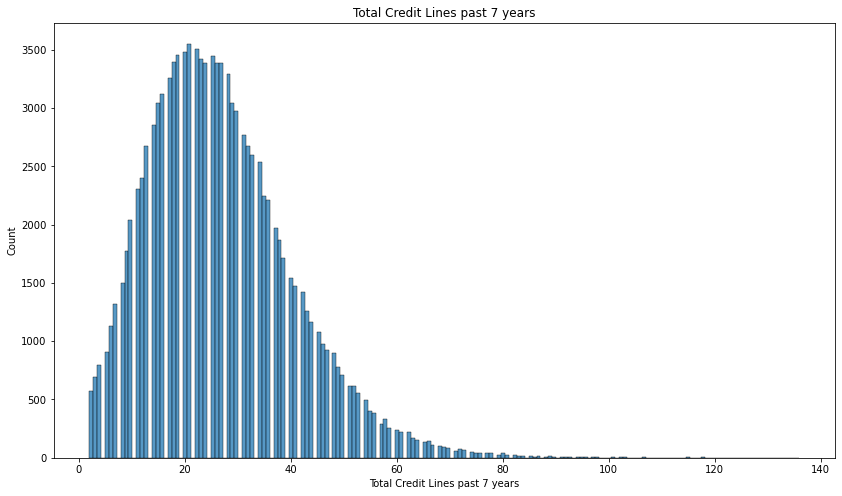

In [27]:
# plot the Number of Total Credit Lines past 7 years

plt.figure(figsize=[14, 8])
sns.histplot(data = df, x = 'TotalCreditLinespast7years');
plt.title('Total Credit Lines past 7 years')
plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

The mean of total credit line in the past 7 years were 26 and the maximum total credit line is 136 for just one person.
The graph distribution appers to be right skewed.

#### Total Inquiries and Inquiries Last 6 Months

In [28]:
print(df.TotalInquiries.describe()) 
print(df.InquiriesLast6Months.describe())

count    112778.000000
mean          5.584405
std           6.429946
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         379.000000
Name: TotalInquiries, dtype: float64
count    113240.000000
mean          1.435085
std           2.437507
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         105.000000
Name: InquiriesLast6Months, dtype: float64


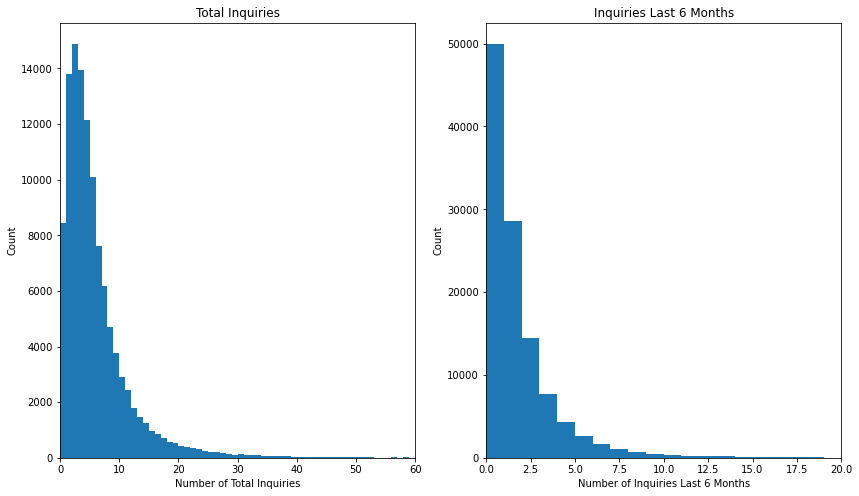

In [29]:
# Define the figure size
plt.figure(figsize = [14, 8])

# histogram on left: Total Inquiries
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['TotalInquiries'].max()+1, 1)
plt.hist(data=df, x='TotalInquiries', bins = bin_edges)
plt.title('Total Inquiries')
plt.xlabel('Number of Total Inquiries')
plt.ylabel('Count')
plt.xlim(0, 60);

# histogram on right:Inquiries Last 6 Months
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, df['InquiriesLast6Months'].max()+1, 1)
plt.hist(data=df, x='InquiriesLast6Months', bins = bin_edges)
plt.title('Inquiries Last 6 Months')
plt.xlabel('Number of Inquiries Last 6 Months')
plt.ylabel('Count')
plt.xlim(0, 20);

The Total inquiries and Inquiries for the last 6 months graphs appear to have the same right skewed distribution.
In both there is a greater concentration in the smallest number of inquiries.

#### Current Delinquencies and Amount Delinquent

In [30]:
print(df.CurrentDelinquencies.describe()) 
print(df.AmountDelinquent.describe())

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64
count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64


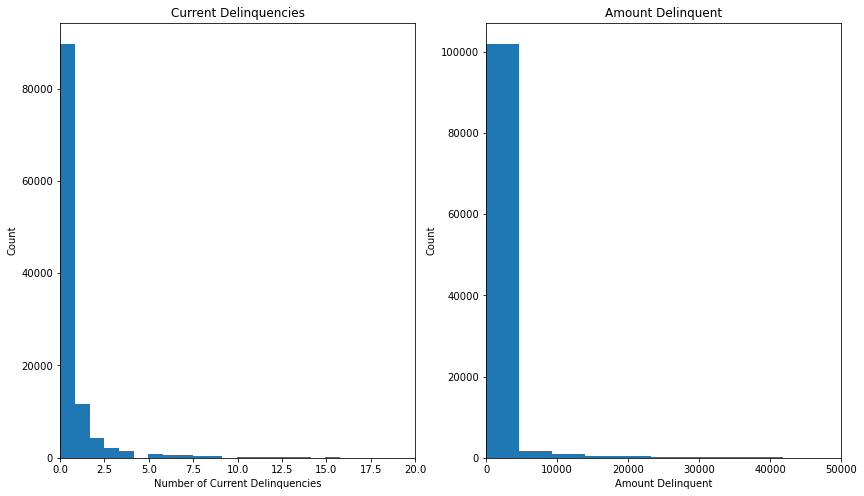

In [31]:
# Define the figure size
plt.figure(figsize = [14, 8])

# histogram on left: Current Delinquencies
plt.subplot(1, 2, 1)
plt.hist(data=df, x='CurrentDelinquencies', bins = 100)
plt.title('Current Delinquencies')
plt.xlabel('Number of Current Delinquencies')
plt.ylabel('Count')
plt.xlim(0, 20);

# histogram on right: Amount Delinquent
plt.subplot(1, 2, 2)
plt.hist(data=df, x='AmountDelinquent', bins = 100)
plt.title('Amount Delinquent')
plt.xlabel('Amount Delinquent')
plt.ylabel('Count')
plt.xlim(0, 50000);


#### Bankcard Utilization and Available Bankcard Credit

In [32]:
print(df.BankcardUtilization.describe())
print(df.AvailableBankcardCredit.describe())

count    106333.000000
mean          0.561309
std           0.317918
min           0.000000
25%           0.310000
50%           0.600000
75%           0.840000
max           5.950000
Name: BankcardUtilization, dtype: float64
count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64


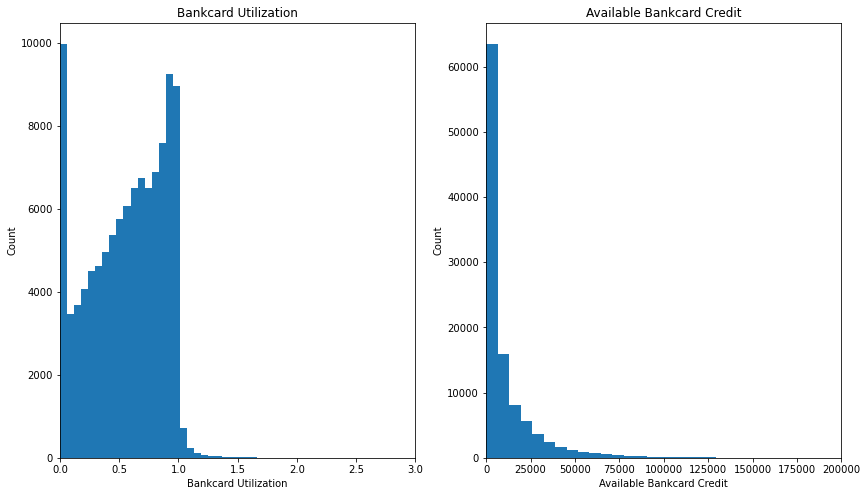

In [33]:
# Define the figure size
plt.figure(figsize = [14, 8])

# histogram on left: Bankcard Utilization
plt.subplot(1, 2, 1)

plt.hist(data=df, x='BankcardUtilization', bins = 100)
plt.title('Bankcard Utilization')
plt.xlabel('Bankcard Utilization')
plt.ylabel('Count')
plt.xlim(0, 3);

# histogram on right: Available Bankcard Credit
plt.subplot(1, 2, 2)

plt.hist(data=df, x='AvailableBankcardCredit', bins = 100)
plt.title('Available Bankcard Credit')
plt.xlabel('Available Bankcard Credit')
plt.ylabel('Count')
plt.xlim(0, 200000);

The mean Bankcard Utilization is 56% and the Available Bankcard Credit mean is 11,210. 
In the B ankcard Utilization graph we can notice a large number of people using almost the entire credit card limit.
The total credit available via bank card at the time the credit profile was pulled shows that a large amount of people had an available limit below 12,000.

#### Debt To Income Ratio

In [34]:
#Filter only completed Loans
filter_loan = df.query('LoanStatus=="Completed"')

In [35]:
filter_loan.DebtToIncomeRatio.describe()

count    35340.000000
mean         0.264161
std          0.628903
min          0.000000
25%          0.120000
50%          0.190000
75%          0.290000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

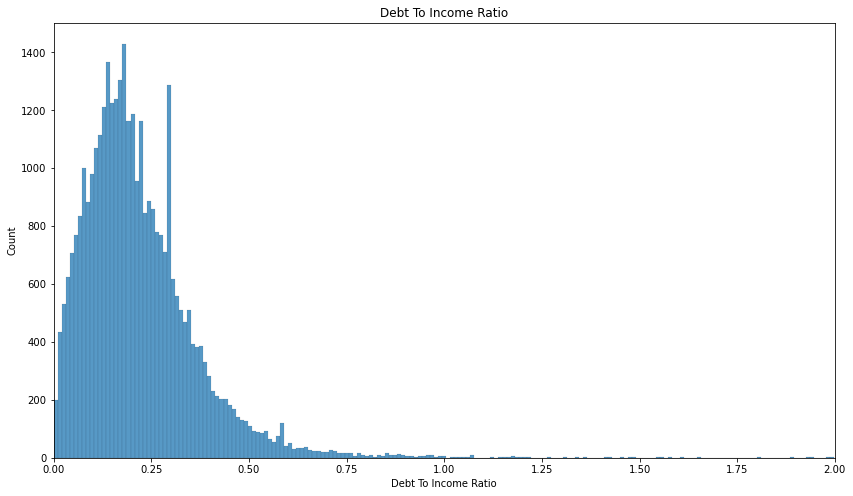

In [36]:
# plot the Debt To Income Ratio

plt.figure(figsize=[14, 8])
sns.histplot(data = filter_loan, x = 'DebtToIncomeRatio');
plt.title('Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.xlim(0, 2);

The debt to income ratio refers to the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available.
The average Debt To Income Ratio is 26% and the graph is right skewed. We can notice a growing drop in the number of people who have a ratio greater than 20%.

#### Income Range

In [37]:
df.IncomeRange.describe()

count             113937
unique                 8
top       $25,000-49,999
freq               32192
Name: IncomeRange, dtype: object

In [38]:
df['IncomeRange'].replace(['Not displayed'], '$0', inplace = True)

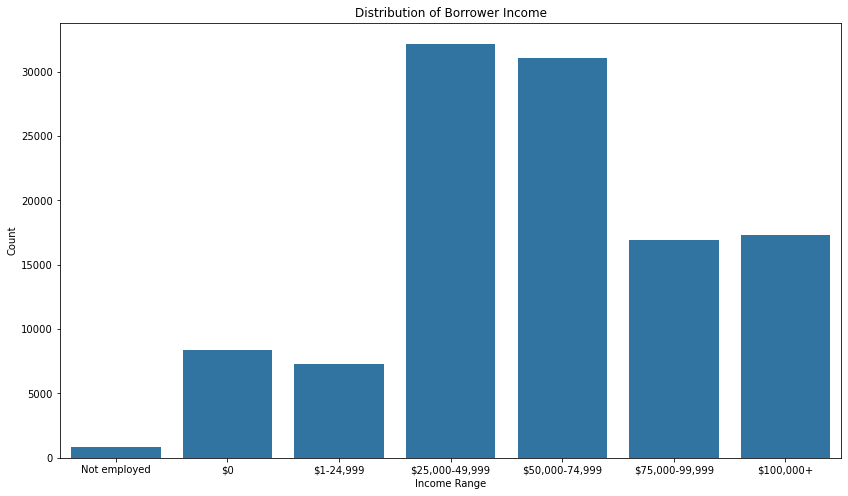

In [39]:
# create ordinal categories for income and plot a histogram

ranges = [ 'Not employed', '$0', '$1-24,999', '$25,000-49,999',  '$50,000-74,999', '$75,000-99,999', '$100,000+']          
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ranges)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.countplot(data = df, x = 'IncomeRange', color = color)
plt.title('Distribution of Borrower Income')
plt.xlabel('Income Range')
plt.ylabel('Count');

We can see in the graph an income concentration in the range of $ 25,000 - $ 74,999. The largest range of borrowers is $ 25,000 - $ 49,999.

#### Prosper Principal Borrowed

In [40]:
df.ProsperPrincipalBorrowed.describe()

count    22085.000000
mean      8472.311961
std       7395.507650
min          0.000000
25%       3500.000000
50%       6000.000000
75%      11000.000000
max      72499.000000
Name: ProsperPrincipalBorrowed, dtype: float64

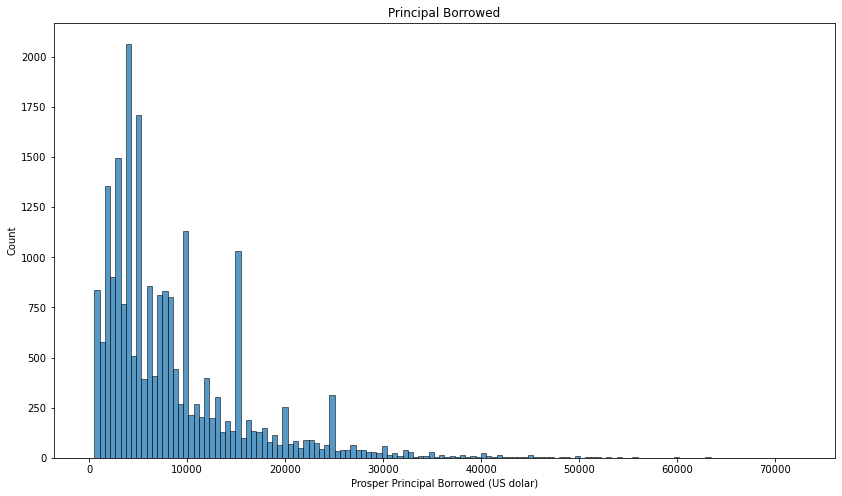

In [41]:
# plot the Prosper Principal Borrowed

plt.figure(figsize=[14, 8])
sns.histplot(data = df, x = 'ProsperPrincipalBorrowed')
plt.title('Principal Borrowed')
plt.xlabel('Prosper Principal Borrowed (US dolar)')
plt.ylabel('Count');

There is a large amount of loan values up to 11,000, then there is a big spike in the values of 15,000, 20,000 and $25,000.

#### Loan Origination Quarter

In [42]:
# order the Loan Origination Quarter 

df_ordered = df.sort_values(by='LoanOriginationQuarter')
df_ordered

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualReturns
1907,65E03365906900318D38961,794,2006-02-26 11:23:22.720000000,C,36,Completed,2009-04-17 00:00:00,0.11094,0.1040,0.0990,...,-121.3700,0.00,0.00,0.0,1.0,0,0,0.0,68,1.168693
39214,7BD533658610252386B8ACE,1569,2006-03-08 20:56:16.033000000,HR,36,Defaulted,2007-05-14 00:00:00,0.32037,0.3125,0.2950,...,0.0000,2219.03,2207.08,0.0,1.0,0,0,0.0,16,-0.302262
106554,F1BF3365978675477F4D869,106,2006-01-28 16:35:51.730000000,HR,36,Completed,2008-03-17 00:00:00,0.13956,0.1325,0.1150,...,-761.6653,0.00,0.00,0.0,1.0,0,0,0.0,3,1.294002
48975,B25333653852783306D9BEB,945,2006-02-28 21:08:48.593000000,AA,36,Completed,2008-03-14 00:00:00,0.07529,0.0685,0.0635,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,24,1.101640
9180,0BEC33653408877891D642F,1423,2006-03-07 15:18:52.583000000,HR,36,Completed,2009-03-21 00:00:00,0.25506,0.2475,0.2300,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,27,1.417400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103194,E38335937498802202372E7,964381,2013-10-29 12:10:22.633000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,1,0.068142
91167,AC9D3595601755872AFDD86,1034332,2013-12-07 14:34:32.200000000,NaN,60,Current,NaN,0.20040,0.1765,0.1665,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,1,0.051613
6211,4C183589576738443FC3F12,941280,2013-09-30 09:05:18.600000000,NaN,60,Current,NaN,0.29618,0.2699,0.2599,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,7,0.125446
57300,964735930394108434B96E8,990909,2013-10-20 19:00:32.937000000,NaN,60,Current,NaN,0.26333,0.2379,0.2279,...,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,48,0.117903


In [43]:
# create a copy
df['LoanData'] = df['LoanOriginationQuarter']
df['LoanData']

0         Q3 2007
1         Q1 2014
2         Q1 2007
3         Q4 2012
4         Q3 2013
           ...   
113932    Q2 2013
113933    Q4 2011
113934    Q4 2013
113935    Q4 2011
113936    Q1 2014
Name: LoanData, Length: 113937, dtype: object

In [44]:
# split the quarter and create a new column
df['LoanData'] = df['LoanData'].str.split(' ', n=1, expand=True)
df['LoanData']

0         Q3
1         Q1
2         Q1
3         Q4
4         Q3
          ..
113932    Q2
113933    Q4
113934    Q4
113935    Q4
113936    Q1
Name: LoanData, Length: 113937, dtype: object

In [45]:
# split the year data and create a new column
df['year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year
df['year']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: year, Length: 113937, dtype: int64

In [46]:
# concatenate both columns splited before to create a new one with the querter in the end
df['YearQuarter'] = df['year'].astype(str) + df['LoanData']
df['YearQuarter']

0         2007Q3
1         2014Q1
2         2007Q1
3         2012Q4
4         2013Q3
           ...  
113932    2013Q2
113933    2011Q4
113934    2013Q4
113935    2011Q4
113936    2014Q1
Name: YearQuarter, Length: 113937, dtype: object

In [47]:
# order the YearQuarter 
df_order = df.sort_values(by='YearQuarter')
df_order

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualReturns,LoanData,year,YearQuarter
103509,0E0F336443449038617E9F4,59,2005-12-21 19:37:33.813000000,A,36,Completed,2008-12-30 00:00:00,NaN,0.09450,0.0845,...,0.0,1.011,0,0,0.0,14,1.151938,Q4,2005,2005Q4
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810000000,AA,36,Completed,2006-03-21 00:00:00,NaN,0.06395,0.0552,...,0.0,1.000,0,0,0.0,4,1.013927,Q4,2005,2005Q4
81848,584D3364403680278BB6704,28,2005-11-21 19:35:46.890000000,D,36,Completed,2008-03-18 00:00:00,NaN,0.13000,0.0950,...,0.0,1.000,0,0,0.0,4,1.213546,Q4,2005,2005Q4
43587,2F123364529418907A58D4C,19,2005-11-18 14:16:59.093000000,AA,36,Completed,2005-11-29 00:00:00,NaN,0.08500,0.0750,...,0.0,1.000,0,0,0.0,6,1.000440,Q4,2005,2005Q4
39870,B6E73366056348939D8801F,24,2005-11-20 14:45:55.193000000,C,36,Completed,2006-10-24 00:00:00,NaN,0.12000,0.1150,...,0.0,1.000,0,0,0.0,6,1.099966,Q4,2005,2005Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69372,76373601295205693D88BC0,1151124,2014-01-20 11:10:35.027000000,NaN,36,Current,NaN,0.13799,0.10990,0.0999,...,0.0,1.000,0,0,0.0,1,0.033282,Q1,2014,2014Q1
6834,2FAA36048617908344EC924,1223696,2014-03-04 08:02:45.777000000,NaN,36,Current,NaN,0.15850,0.12240,0.1124,...,0.0,1.000,0,0,0.0,1,0.000000,Q1,2014,2014Q1
69369,762536004030772395486B2,1160621,2014-01-24 17:53:04.437000000,NaN,36,Current,NaN,0.17151,0.13550,0.1255,...,0.0,1.000,0,0,0.0,1,0.000000,Q1,2014,2014Q1
69367,76103599649315371533499,1129719,2014-01-08 23:29:09.407000000,NaN,36,Current,NaN,0.18633,0.15000,0.1400,...,0.0,1.000,0,0,0.0,1,0.035102,Q1,2014,2014Q1


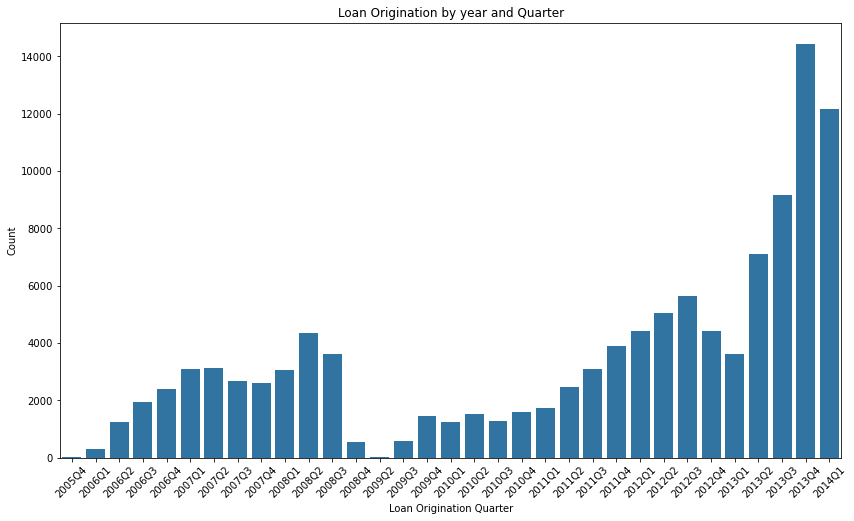

In [48]:
# plot the Loan Origination Quarter

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.countplot(data = df_order, x = 'YearQuarter', color = color)
plt.title('Loan Origination by year and Quarter')
plt.xlabel('Loan Origination Quarter')
plt.xticks(rotation = 45)
plt.ylabel('Count');

In [49]:
# order the Laon Data column
df_order = df.sort_values(by='LoanData')
df_order

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualReturns,LoanData,year,YearQuarter
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,0.0,1.0,0,0,0.0,1,0.033015,Q1,2014,2014Q1
26887,C2B736032945640836E7A11,1181026,2014-02-24 13:40:37.367000000,NaN,36,Current,NaN,0.22966,0.1920,0.1820,...,0.0,1.0,0,0,0.0,1,0.000000,Q1,2014,2014Q1
26885,C2B53537487704562053D0E,554100,2012-01-25 12:40:03.507000000,NaN,60,Current,NaN,0.27246,0.2468,0.2368,...,0.0,1.0,0,0,0.0,24,0.687909,Q1,2012,2012Q1
26884,C2A3350667675720073DE77,491335,2011-01-22 05:58:44.697000000,NaN,36,Completed,2013-01-25 00:00:00,0.28488,0.2499,0.2399,...,0.0,1.0,0,0,0.0,70,1.398492,Q1,2011,2011Q1
72332,89A73504694085702552838,489554,2010-12-30 14:55:28.197000000,NaN,36,Chargedoff,2012-11-09 00:00:00,0.35858,0.3220,0.3120,...,819.9,1.0,0,0,0.0,52,0.905964,Q1,2011,2011Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87808,B0A335911087670681F7564,940095,2013-09-29 19:51:27.333000000,NaN,60,Current,NaN,0.21115,0.1870,0.1770,...,0.0,1.0,0,0,0.0,1,0.132424,Q4,2013,2013Q4
17038,AD3835895752201481D0BBB,938295,2013-09-29 12:29:48.187000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,0.0,1.0,0,0,0.0,1,0.146590,Q4,2013,2013Q4
17037,AC6835310712650938EDF19,536372,2011-10-30 09:26:14.893000000,NaN,36,Current,NaN,0.20200,0.1799,0.1699,...,0.0,1.0,0,0,0.0,56,0.988825,Q4,2011,2011Q4
61457,25423597966342183FEA65D,1082931,2013-12-12 12:52:31.353000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,0.0,1.0,0,0,0.0,2,0.084955,Q4,2013,2013Q4


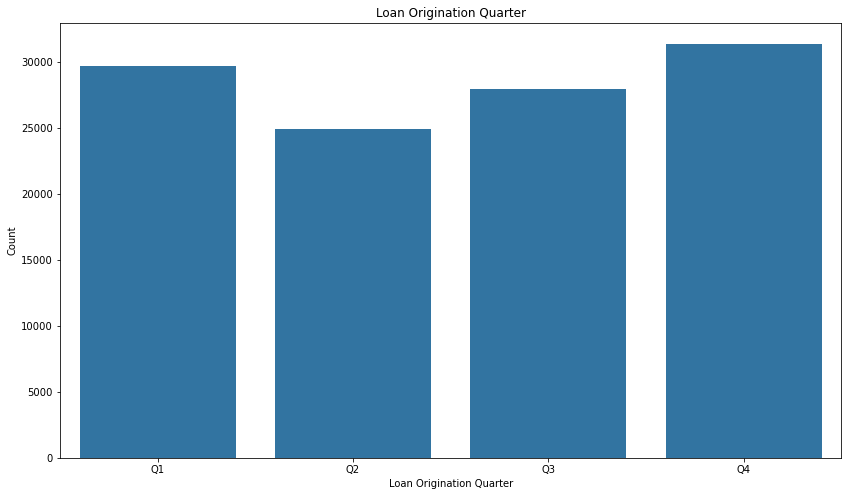

In [50]:
# plot the Loan Origination Quarter

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.countplot(data = df_order, x = 'LoanData', color = color)
plt.title('Loan Origination Quarter')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Count');

There is an exponential increase in the number of loans as of the second half of 2013.
The quarters with the highest number of loan applications are the fourth and first semester, respectively. The Quarter with the lowest demand is the second.

#### Monthly Loan Payment

In [51]:
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

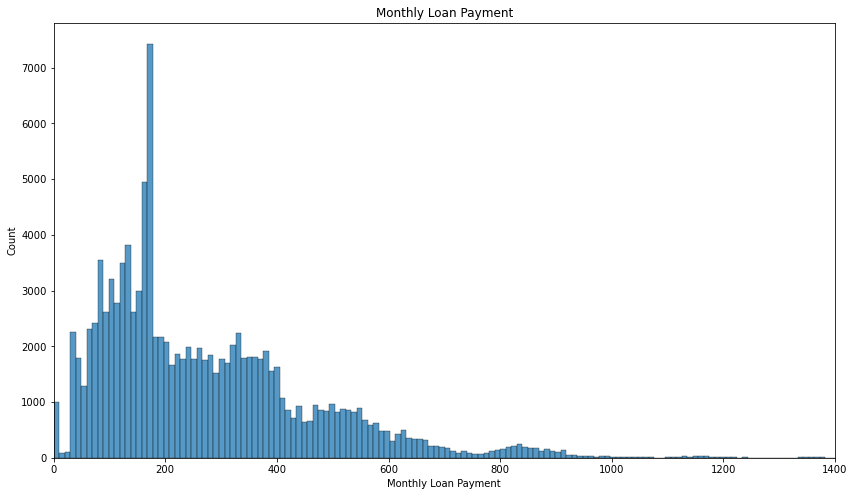

In [52]:
# plot the Monthly Loan Payment

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.histplot(data = df_order, x = 'MonthlyLoanPayment', color = color)
plt.title('Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.xlim(0, 1400);

The scheduled monthly loan payment in the range of up to 200 dollars is the highest concentration range. After 400 dollars, the programmed value of the loan starts to decrease drastically.

#### Percent Funded

In [53]:
df.PercentFunded.describe()

count    113937.000000
mean          0.998584
std           0.017919
min           0.700000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.012500
Name: PercentFunded, dtype: float64

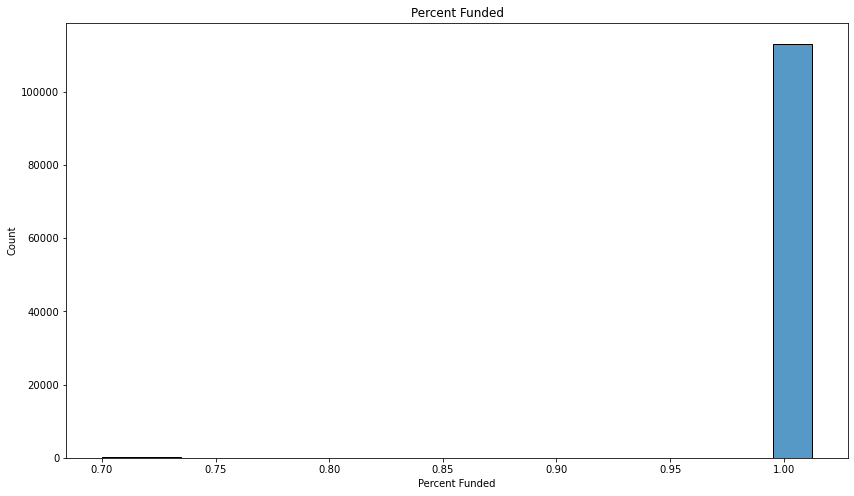

In [54]:
# plot the Percent Funded

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.histplot(data = df_order, x = 'PercentFunded', color = color)
plt.title('Percent Funded')
plt.xlabel('Percent Funded')
plt.ylabel('Count');

We can note that most of the amounts accepted for financing were accepted in full.
The average percentage of the list that was funded was 99%.
The minimum percentage financed was 70%.

#### Recommendations

In [55]:
df.Recommendations.describe()

count    113937.000000
mean          0.048027
std           0.332353
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64

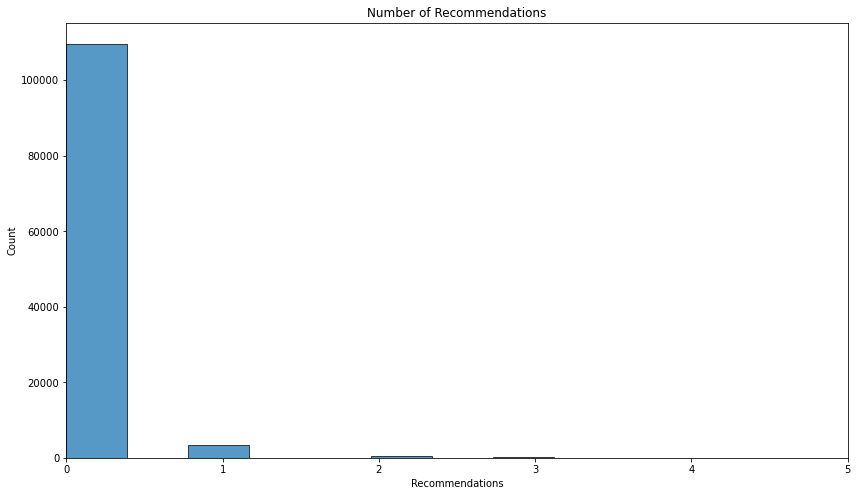

In [56]:
# plot the Monthly Loan Payment

color = sns.color_palette()[0]
plt.figure(figsize=[14, 8])
sns.histplot(data = df_order, x = 'Recommendations', color = color, bins = 100)
plt.title('Number of Recommendations')
plt.xlabel('Recommendations')
plt.ylabel('Count')
plt.xlim(0, 5);

There is a small percentage of loan applicants who receive referrals. The average order for each loan was only 0.048 person.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Nothing unusual was noticed in the dataset. The distributions of the graphs showed expected results, without any complications.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of the graphs performed did not show unexpected results. It was necessary to add some columns to have a better visualization, changes of dtypes to visualize dates and manipulation of formulas to generate data that were not available in the dataset.

## Bivariate Exploration
<a id="2"></a>

> In this section, the relationships between pairs of variables in the dataset will be investigated.

##### Let's explore the relationship between Borrower Income Range with other quantitative data available.

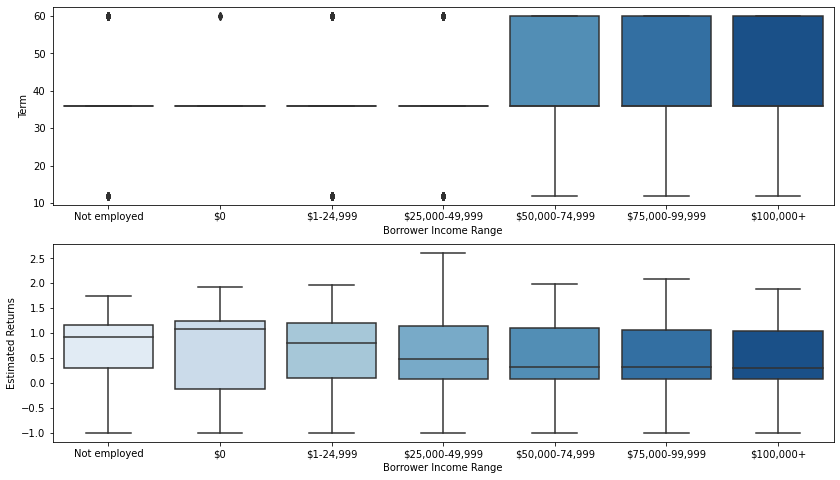

In [57]:
# plot a boxplot
plt.figure(figsize = [14, 8])

#subplot 1: Income Range vs term
plt.subplot(2, 1, 1)
sns.boxplot(data = df, x = 'IncomeRange', y = 'Term', palette = "Blues")
plt.xlabel('Borrower Income Range')
plt.ylabel('Term');

#subplot 2: Income Range vs. Actual Returns
plt.subplot(2, 1, 2)
sns.boxplot(data = df, x = 'IncomeRange', y = 'ActualReturns', palette = "Blues")
plt.xlabel('Borrower Income Range')
plt.ylabel('Estimated Returns');

> First chart: In the ranges above 50,000 dollars, the duration of the loans goes above 36 months and reaches up to 60 months. A value that, in income ranges below, very few spend more than 36 months.

> Second chart: Above 50,000 there is an estimated return that barely changes in its ranges. Their return averages are in the 50% range, while in smaller ranges, there are much larger estimates averages from 50% to just over 100%.

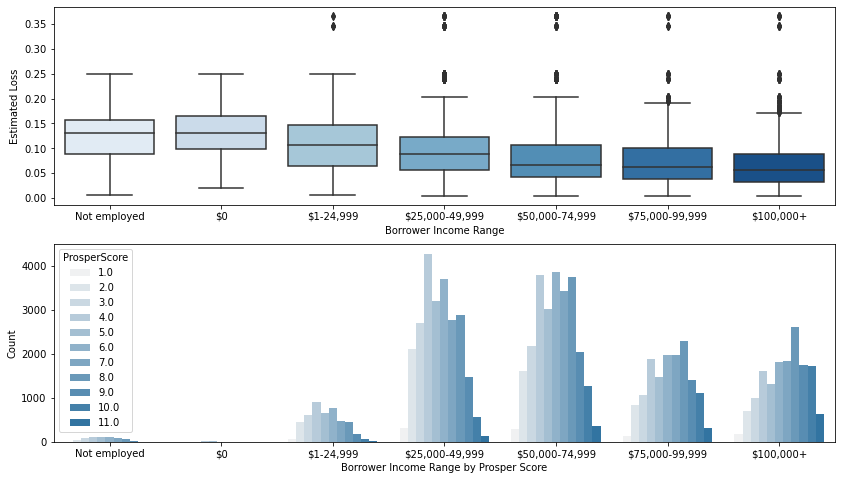

In [58]:
# plot boxplot
plt.figure(figsize = [14, 8])
color = sns.color_palette()[0]

# subplot 1: Income Range vs. Estimated Loss
ax = plt.subplot(2, 1, 1)
sns.boxplot(data = df, x = 'IncomeRange', y = 'EstimatedLoss', palette = "Blues")
plt.xlabel('Borrower Income Range')
plt.ylabel('Estimated Loss');
           
# subplot 2: Income Range vs. Prosper Score
ax = plt.subplot(2, 1, 2)
sns.countplot(data = df, x = 'IncomeRange', hue = 'ProsperScore', color = color)
plt.xlabel('Borrower Income Range by Prosper Score')
plt.ylabel('Count');

> First chart:
We can notice that an Income Range large than 100.000 dolars have a Estimated Loss lower than the others Income Ranges.
An income higher than 50.000 dolars have an estimated loss lower than 10%.
Not employed, zero income and an income until 24.999 dolars have a mean of estimated loss higher than 10%, but lower than 15%.

> Second chart:
Is very interesting see how Prosper score is not necessarily correlated with higher incomes. When it comes to loan volume, there is a drop in the amount of credit for ratings above 8.
Credit request volumes are concentrated in ratings from 4 to 7.

In [59]:
nu_vars = ['EstimatedLoss', 'BorrowerAPR']

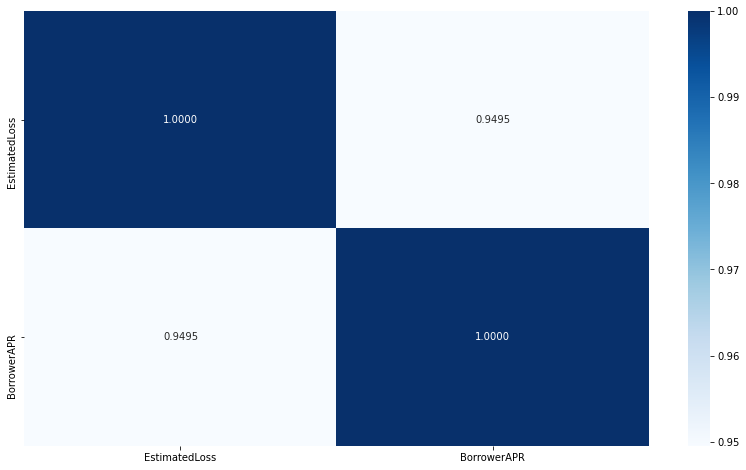

In [60]:
# correlation plot
plt.figure(figsize = [14, 8])
sns.heatmap(df[nu_vars].corr(), annot = True, fmt = '.4f',
           cmap = 'Blues');

In [61]:
# Convert ProsperRating into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
filter_loan['ProsperRating (Alpha)'] = filter_loan['ProsperRating (Alpha)'].astype(ordered_var)

<ipython-input-61-bab275ff0a6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_loan['ProsperRating (Alpha)'] = filter_loan['ProsperRating (Alpha)'].astype(ordered_var)


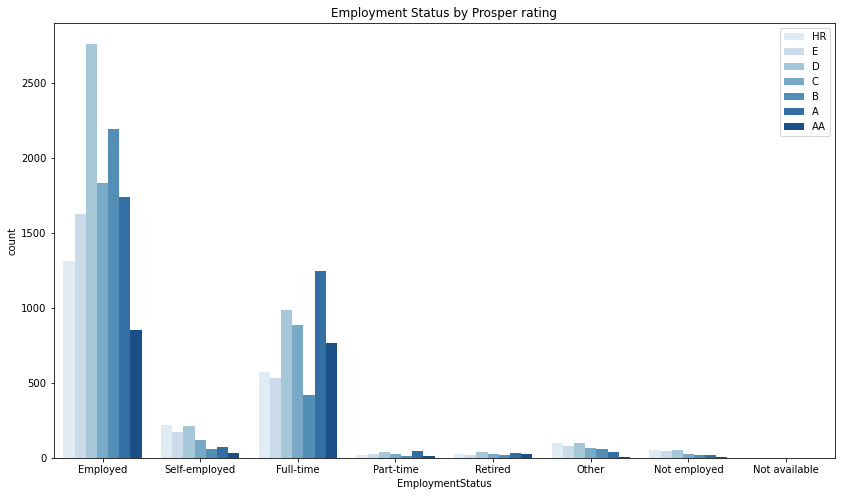

In [62]:
# Prosper rating vs. employment status
plt.figure(figsize = [14, 8])
ax = sns.countplot(data = filter_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 1)
plt.title('Employment Status by Prosper rating');

The vast majority of approved loan applications are from people who are employed or work full-time
The distribution of prosper rating who works less than full time is very uniform in all bands. 
For those who are employed, the classes with the highest volume of loans are in the D, C, B and A ranges.
The characteristic of volume of approved loans from those who are not employed is that they are concentrated in ratings considered to be lower and as the rating gets better, the number of approvals decreases.

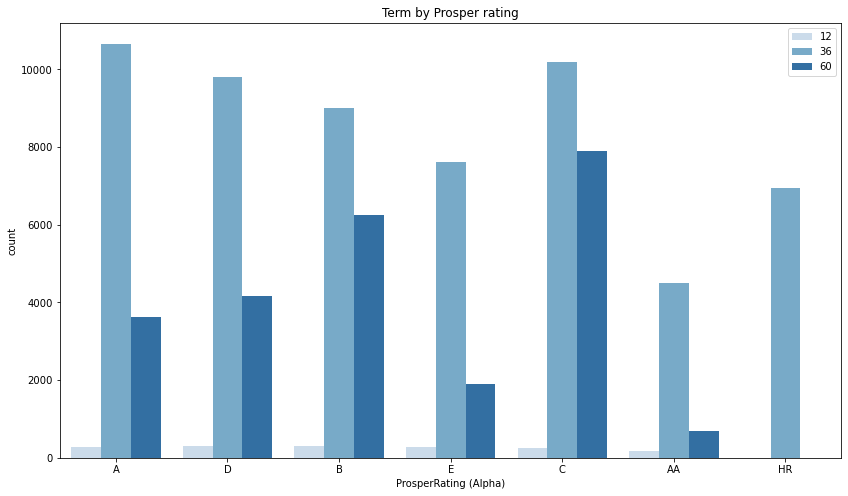

In [63]:
# Prosper rating vs. Term
plt.figure(figsize = [14, 8])
ax = sns.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
ax.legend(loc = 1, ncol = 1)
plt.title('Term by Prosper rating');

There is a low 12-month loan time demand across all Prospers ratings.
Class C is the most demanding 60-month loan and class A is the most demanding 36-month loan.

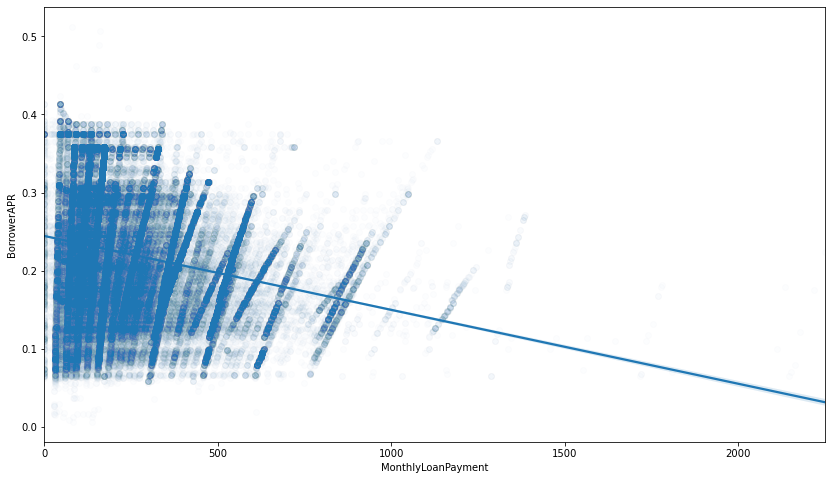

In [64]:
# plot bivariate relationships between Monthly Loan Payment and Borrower APR
plt.figure(figsize = [14, 8])
sns.regplot(data = df, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

We can notice in the graph that the Borrower's Annual Percentage Rate decrease when Monthly Loan Payment gets higher

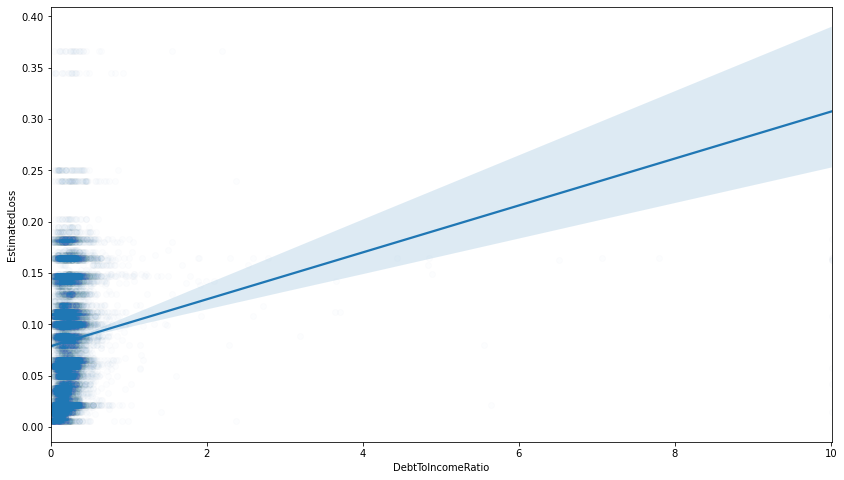

In [65]:
plt.figure(figsize = [14, 8])
sns.regplot(data = filter_loan, x = 'DebtToIncomeRatio', y = 'EstimatedLoss', scatter_kws={'alpha':0.01});

We can clearly see in the graph the high correlation of high debt to income ratio index and estimated loss.

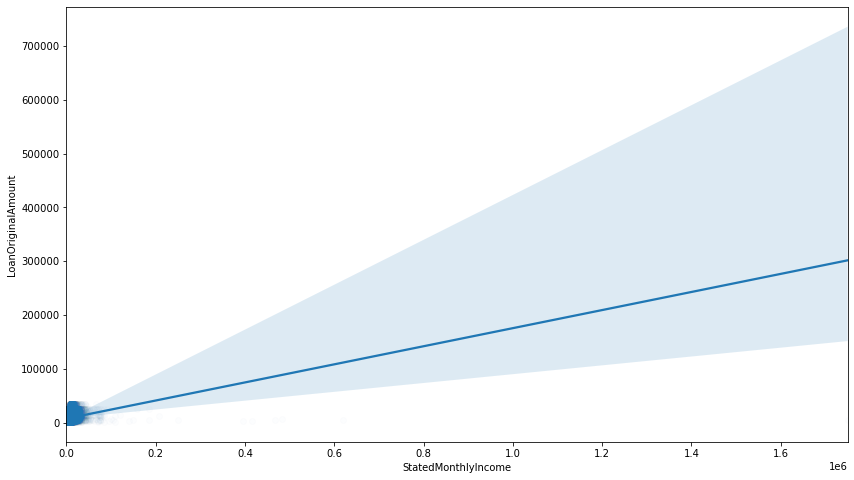

In [66]:
# plot the relationship between Stated Monthly Income and Loan Original Amount
plt.figure(figsize = [14, 8])  
sns.regplot(data = df, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.01});

The relationship between Stated Monthly Income and Loan Original Amount is it is positively correlated.

In [67]:
# filter Loan status by Completed, Defaulted and Chargedoff
Loan = df.query('LoanStatus=="Completed" or LoanStatus=="Defaulted" or LoanStatus=="Chargedoff" ')
Loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualReturns,LoanData,year,YearQuarter
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.00,1.0,0,0,0.0,258,1.223270,Q3,2007,2007Q3
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.00,1.0,0,0,0.0,41,1.403142,Q1,2007,2007Q1
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,0.00,1.0,0,0,0.0,53,1.012530,Q4,2007,2007Q4
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,0.00,1.0,0,0,0.0,10,-0.814827,Q2,2012,2012Q2
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,268.96,1.0,0,0,0.0,85,-0.036377,Q3,2006,2006Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113926,E34333654295683286C35C2,28121,2006-08-01 10:31:31.143000000,E,36,Defaulted,2007-09-06 00:00:00,0.29776,0.2900,0.2850,...,0.00,1.0,0,0,0.0,39,-0.507000,Q3,2006,2006Q3
113927,E3433419834735803891976,322787,2008-04-30 21:25:19.670000000,AA,36,Completed,2011-05-09 00:00:00,0.07469,0.0679,0.0579,...,0.00,1.0,2,0,0.0,194,1.124275,Q2,2008,2008Q2
113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,NaN,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,...,0.00,1.0,0,0,0.0,25,1.044015,Q2,2011,2011Q2
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,NaN,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,...,0.00,1.0,0,0,0.0,26,1.071648,Q3,2013,2013Q3


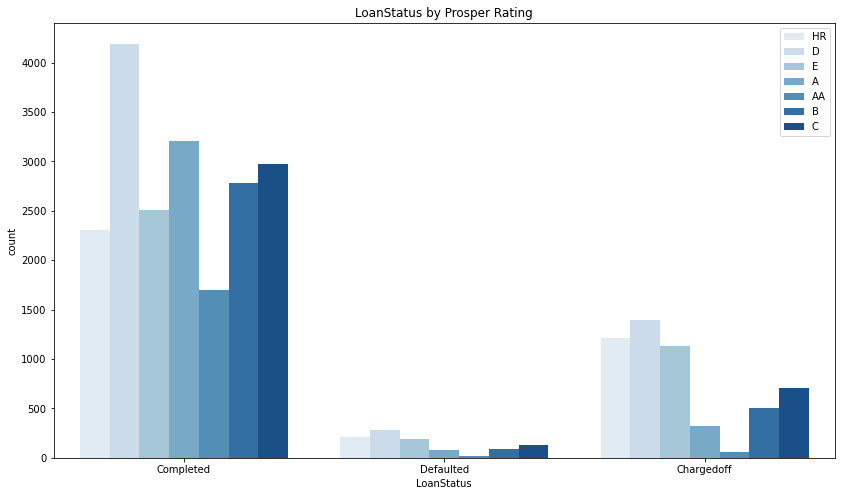

In [68]:
# Loan Status vs. Prosper Ratings
plt.figure(figsize = [14, 8])
ax = sns.countplot(data = Loan, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 1)
plt.title('LoanStatus by Prosper Rating');

When the total number of inquiries at the time the credit profile was pulled increases, the total return decreases considerably.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We could see in the graph the high correlation of high debt to income ratio index and estimated loss. The smaller the income commitment per month, the lower the loss rate. Another finding was that the Borrower's Annual Percentage Rate decrease when Monthly Loan Payment gets higher.

> In the ranges above 50,000 dollars, the duration of the loans goes above 36 months and reaches up to 60 months. A value that, in income ranges below, very few spend more than 36 months. Above 50,000 there is an estimated return that barely changes in its ranges. Their return averages are in the 50% range, while in smaller ranges, there are much larger estimates averages from 50% to just over 100%.

> We noticed that an Income Range large than 100.000 dolars have a Estimated Loss lower than the others Income Ranges. An income higher than 50.000 dolars have an estimated loss lower than 10%. Not employed, zero income and an income until 24.999 dolars have a mean of estimated loss higher than 10%, but lower than 15%.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between Stated Monthly Income and Loan Original Amount is it is positively correlated. This proves common sense that those who receive more per month are more likely to request larger amounts of loans.

> There is a low 12-month loan time demand across all Prospers ratings. Class C is the most demanding 60-month loan and class A is the most demanding 36-month loan. 
It is an interesting perception of behavior on the different ratings, demonstrating that class C needs more time to pay while class A requires half the time to pay off the loan.


## Multivariate Exploration
<a id="3"></a>

> The main features that will be investigated in Multivariate Exploration are linked with which borrower's features are best for predicting the highest rate of return and what are the best features to increase the chance of getting a loan.

In [69]:
# numeric and categorical variables
cat_vars = ['ProsperScore', 'IncomeRange','IsBorrowerHomeowner', 'CreditGrade', 'EmploymentStatus', 'IncomeRange']
num_vars = ['BorrowerAPR', 'DebtToIncomeRatio','MonthlyLoanPayment', 'ActualReturns', 'EstimatedLoss', 'CurrentCreditLines', 'EstimatedReturn', 'TotalInquiries','BankcardUtilization','PercentFunded', 'Recommendations' ]

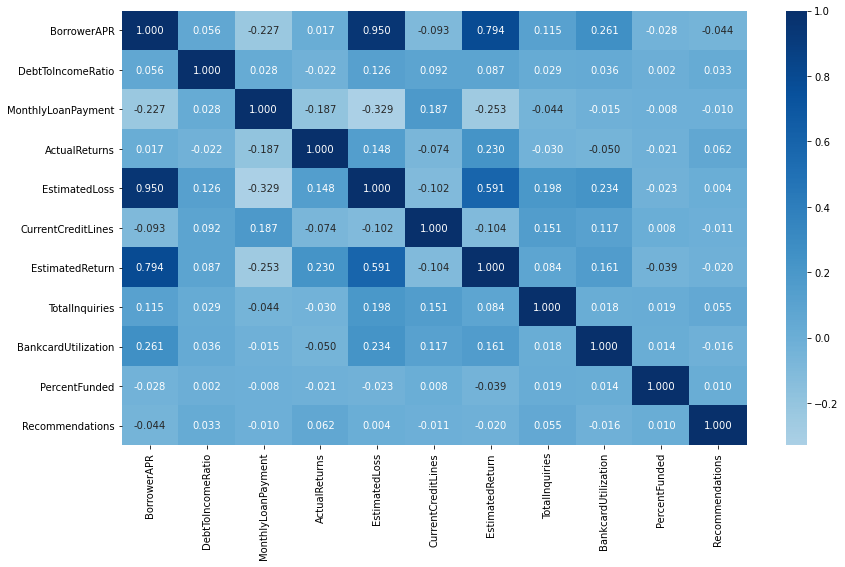

In [70]:
# correlation plot
plt.figure(figsize = [14, 8])
cmap = sns.color_palette("Blues", as_cmap = True)
sns.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0);

There is a strong correlation between BorrowerAPR, EstimatedLoss and EstimatedReturn. A strong correlation according to Pearson is a correlation above 0.4.

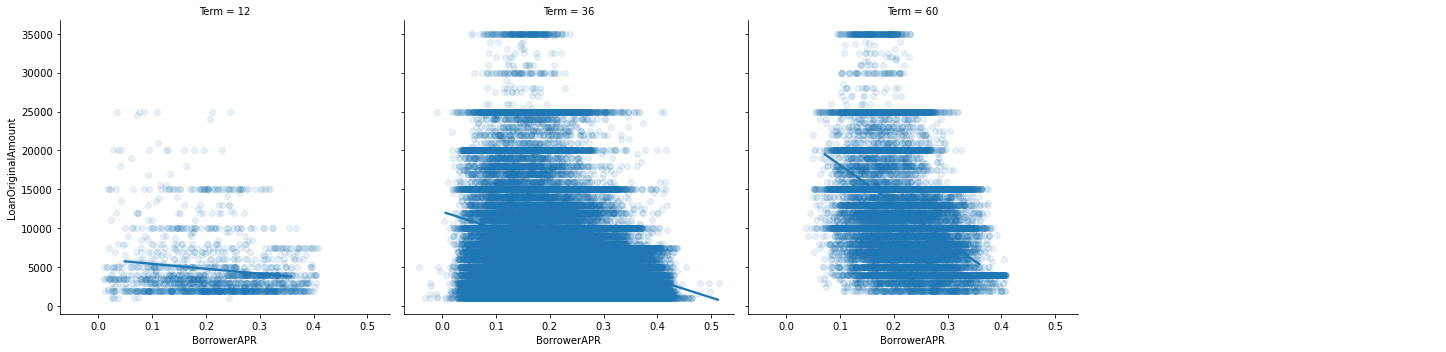

In [71]:
# term relationship with loan amount and BorroweraPR    

g = sns.FacetGrid(data=df, height = 5, col ='Term', col_wrap = 4)
g.map(sns.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter = 0.05, scatter_kws = {'alpha':0.1});
g.add_legend();

It is very interesting to see the difference in Borrower's Annual Percentage Rate for the loan versus the Loan Original amount separated by Term.
As the loan duration increases, the curve becomes steeper, increasing the Original amount and increasingly decreasing the Borrower's APR.

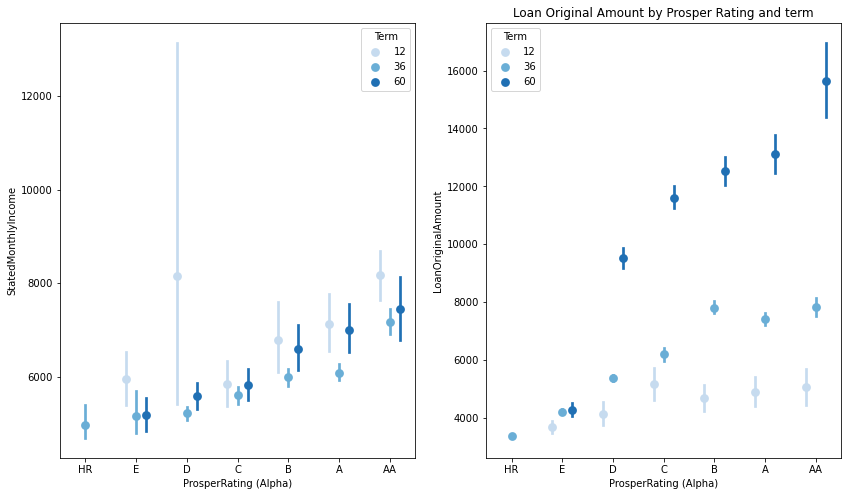

In [72]:
# plot a point plot with only completed loans status and plot the relationsships
fig, ax = plt.subplots(ncols = 2, figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0])
plt.title('Monthly Income by Prosper Rating and Term')

sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1])
plt.title('Loan Original Amount by Prosper Rating and term');

There is a strong correlation of approved loans with the original Loan amount, monthly income and term. Prosper Rating appears to have a positive variation from mild to moderate when compared to other features.

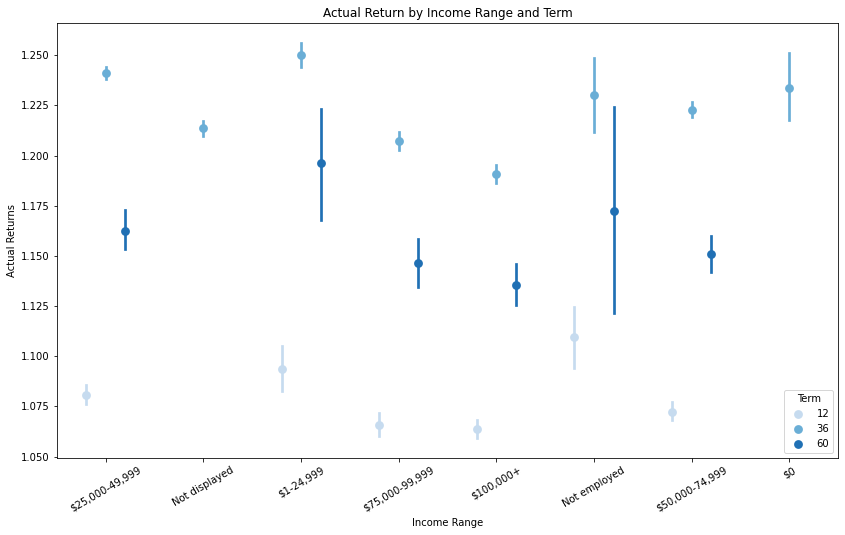

In [73]:
# plot the relationship between Income Range, Actual return and Term
plt.figure(figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'IncomeRange', y = 'ActualReturns', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 30)
plt.xlabel('Income Range')
plt.ylabel('Actual Returns')
plt.title('Actual Return by Income Range and Term');

In the separation of Actual Retruns by Term and Income Range, there is a clear separation of Return by loan time. The time that brought the most current returns was 36 months, then 60 months and the one that brought the least return was 12 months.

At all times of borrowing, the return starts to decline from the $25,000 range. The most profitable were 0-24,999, Not employed and no income, respectively.

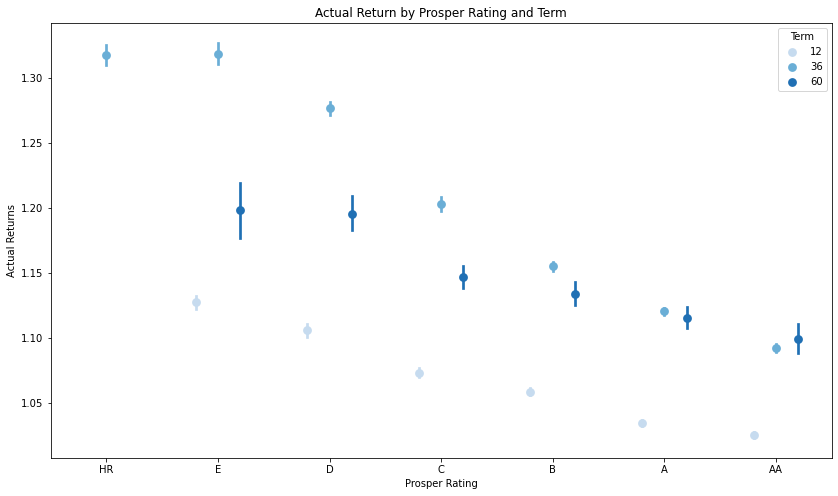

In [74]:
# plot the relationship between Prosper Rating, Actual return and Term
plt.figure(figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'ActualReturns', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('Prosper Rating')
plt.ylabel('Actual Returns')
plt.title('Actual Return by Prosper Rating and Term');

Having a rating below C is where you got the highest current return. Ratings B, A and AA returned below 115%, while the lowest returned above 125%.

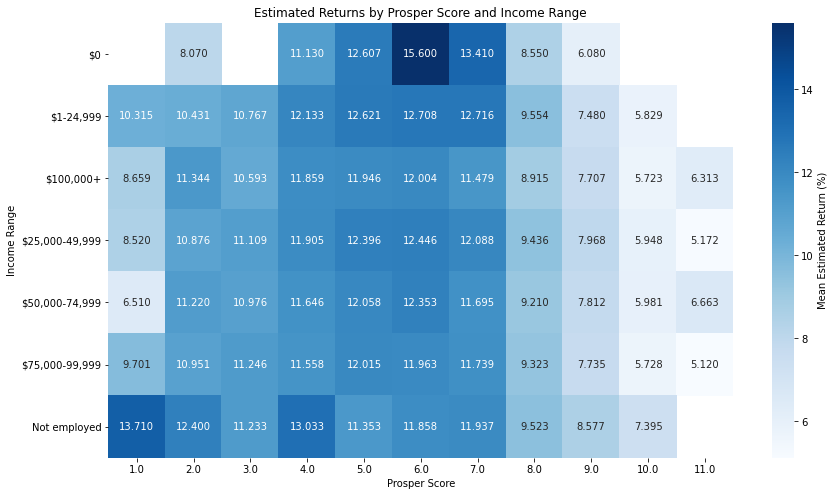

In [75]:
# plot heat map of Mean Estimated Return with completed lean status
plt.figure(figsize = [14,8])

categ_values = filter_loan.groupby(['ProsperScore', 'IncomeRange']).mean()['EstimatedReturn']*100
categ_values = categ_values.reset_index(name = 'EstimatedReturnMean')
categ_values = categ_values.pivot(index = 'IncomeRange', columns = 'ProsperScore', values = 'EstimatedReturnMean')

sns.heatmap(categ_values, annot = True, cmap = "Blues",  fmt = '.3f',
            cbar_kws = {'label' : 'Mean Estimated Return (%)'})
plt.xlabel('Prosper Score')
plt.ylabel('Income Range')
plt.title('Estimated Returns by Prosper Score and Income Range');

As before, the heatmap confirms the strong correlation between Estimated Return by income range. Being Not employed, without remuneration or have a salary until 24,999 dollars have average expected return being higher than the other salary ranges.
The prosper score is directly correlated with the other two features, with the smallest ranges being more profitable and the best scores much lower, showing an average return of almost half of those with the worst scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Being Not employed and without remuneration with the average expected return being higher than the other salary ranges. The prosper score is directly correlated with the other two features, with the smallest ranges being more profitable and the best scores much lower, showing an average return of almost half of those with the worst scores.

> In the separation of Actual Retruns by Term and Income Range, there is a clear separation of Return by loan time. The time that brought the most current returns was 36 months, then 60 months and the one that brought the least return was 12 months.

> At all times of borrowing, the return starts to decline from the 25,000 range. The most profitable were 0-24,999, Not employed and no income, respectively.

> There is a strong correlation of approved loans with the original Loan amount, monthly income and term. Prosper Rating appears to have a positive variation from mild to moderate when compared to other features.


### Were there any interesting or surprising interactions between features?

> It is very interesting to see the difference in Borrower's Annual Percentage Rate for the loan versus the Loan Original amount separated by Term. As the loan duration increases, the curve becomes steeper, increasing the Original amount and increasingly decreasing the Borrower's APR.

## Conclusions 


> The best features to predict the highest rate of return are:
>- Have a rating score below 8
>- Income range below 25,000
>- Being unemployed, without income or earning up to 25,000
>- Have a Prosper Rating less than B

> The best features to increase the chance of getting a loan are:
>- Monthly income above 3,000 dollars
>- Original amount over 4,000
>- Have a low debt to income ratio
>- Be employed or work Full-time